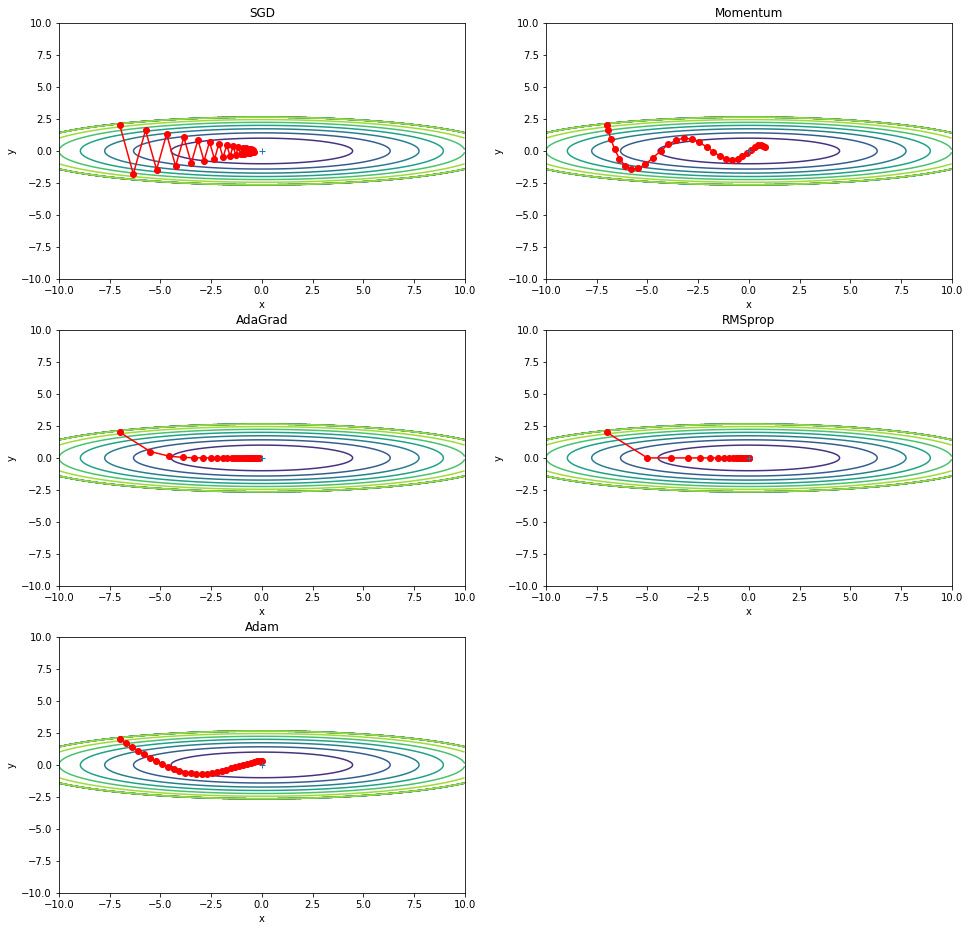

In [5]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2


# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (-2.5, 0.0)
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.3713521304936283
Momentum:2.2745951130621247
AdaGrad:2.258680884320378
Adam:2.1467779532999103
===========iteration:100===========
SGD:1.6823794120538738
Momentum:0.49187001437780825
AdaGrad:0.24824737695007693
Adam:0.35599023753878134
===========iteration:200===========
SGD:0.7917265823567393
Momentum:0.2630240503614347
AdaGrad:0.14441648065817736
Adam:0.23991396932114645
===========iteration:300===========
SGD:0.6451541377139052
Momentum:0.2709311872297323
AdaGrad:0.09726930520805213
Adam:0.24951124624119397
===========iteration:400===========
SGD:0.45683037651728087
Momentum:0.2676492877838448
AdaGrad:0.12586253142862103
Adam:0.14409741286882122
===========iteration:500===========
SGD:0.4665545530478623
Momentum:0.2539234451670812
AdaGrad:0.13307875567267774
Adam:0.1841141325185826
===========iteration:600===========
SGD:0.3277036623147328
Momentum:0.14073736087356778
AdaGrad:0.055323253065389356
Adam:0.06991921354462474
===========iteration:7

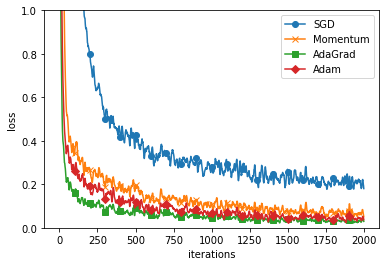

In [25]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

(1000, 100)


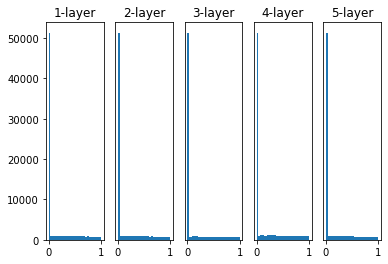

In [38]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.30253538593829
Xavier:2.2955662513373456
He:2.349155033127988
===========iteration:100===========
std=0.01:2.301229713124055
Xavier:2.218760602433748
He:1.4613391089368681
===========iteration:200===========
std=0.01:2.301622622384217
Xavier:2.049221672402566
He:0.7346422705293867
===========iteration:300===========
std=0.01:2.301517987118533
Xavier:1.7152401646932365
He:0.5459527826603675
===========iteration:400===========
std=0.01:2.3036142539610123
Xavier:1.2492321854197967
He:0.43792892228609503
===========iteration:500===========
std=0.01:2.302395027031401
Xavier:0.8989481536660224
He:0.3674287763095121
===========iteration:600===========
std=0.01:2.3033336168945286
Xavier:0.749424800294965
He:0.34601901262469414
===========iteration:700===========
std=0.01:2.3065678688156344
Xavier:0.6698412603004849
He:0.45348645188693365
===========iteration:800===========
std=0.01:2.2980963232630245
Xavier:0.4518687290679876
He:0.2934744809526404
=

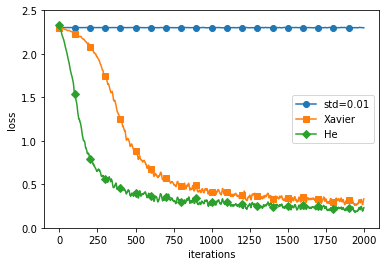

In [39]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [40]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.05076381372290939
W3:0.0
b3:1.7990402263745597e-07


<Figure size 1152x1152 with 0 Axes>

In [44]:
a = np.logspace(0, -10, num=10, base=2)
a

array([1.00000000e+00, 4.62937356e-01, 2.14310996e-01, 9.92125657e-02,
       4.59292029e-02, 2.12623438e-02, 9.84313320e-03, 4.55675406e-03,
       2.10949168e-03, 9.76562500e-04])

In [45]:
a = np.logspace(0, -4, num=16, base=10)
a

array([1.00000000e+00, 5.41169527e-01, 2.92864456e-01, 1.58489319e-01,
       8.57695899e-02, 4.64158883e-02, 2.51188643e-02, 1.35935639e-02,
       7.35642254e-03, 3.98107171e-03, 2.15443469e-03, 1.16591440e-03,
       6.30957344e-04, 3.41454887e-04, 1.84784980e-04, 1.00000000e-04])

============== 1/16 ==============
epoch:0 | 0.117 - 0.077
epoch:1 | 0.105 - 0.096
epoch:2 | 0.116 - 0.13
epoch:3 | 0.116 - 0.145
epoch:4 | 0.116 - 0.154
epoch:5 | 0.116 - 0.177
epoch:6 | 0.116 - 0.195
epoch:7 | 0.116 - 0.214
epoch:8 | 0.116 - 0.229
epoch:9 | 0.116 - 0.24
epoch:10 | 0.116 - 0.259
epoch:11 | 0.116 - 0.278
epoch:12 | 0.116 - 0.292
epoch:13 | 0.116 - 0.302
epoch:14 | 0.116 - 0.314
epoch:15 | 0.116 - 0.338
epoch:16 | 0.116 - 0.348
epoch:17 | 0.116 - 0.367
epoch:18 | 0.116 - 0.381


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.388
============== 2/16 ==============
epoch:0 | 0.087 - 0.123


..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\Users\IoT academy 21\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.136
epoch:2 | 0.097 - 0.158
epoch:3 | 0.097 - 0.183
epoch:4 | 0.097 - 0.201
epoch:5 | 0.097 - 0.227
epoch:6 | 0.097 - 0.253
epoch:7 | 0.097 - 0.279
epoch:8 | 0.097 - 0.3
epoch:9 | 0.097 - 0.324
epoch:10 | 0.097 - 0.351
epoch:11 | 0.097 - 0.375
epoch:12 | 0.097 - 0.407
epoch:13 | 0.097 - 0.43
epoch:14 | 0.097 - 0.456
epoch:15 | 0.097 - 0.47
epoch:16 | 0.097 - 0.498
epoch:17 | 0.097 - 0.515
epoch:18 | 0.097 - 0.529
epoch:19 | 0.097 - 0.543

No handles with labels found to put in legend.



============== 3/16 ==============
epoch:0 | 0.118 - 0.154
epoch:1 | 0.305 - 0.147
epoch:2 | 0.387 - 0.145
epoch:3 | 0.514 - 0.178
epoch:4 | 0.581 - 0.21
epoch:5 | 0.654 - 0.252
epoch:6 | 0.707 - 0.306
epoch:7 | 0.738 - 0.336
epoch:8 | 0.79 - 0.369
epoch:9 | 0.835 - 0.401
epoch:10 | 0.847 - 0.442
epoch:11 | 0.871 - 0.465
epoch:12 | 0.89 - 0.498
epoch:13 | 0.917 - 0.526
epoch:14 | 0.923 - 0.541
epoch:15 | 0.928 - 0.565
epoch:16 | 0.939 - 0.579
epoch:17 | 0.953 - 0.603
epoch:18 | 0.96 - 0.619
epoch:19 | 0.96 - 0.633


No handles with labels found to put in legend.


============== 4/16 ==============
epoch:0 | 0.093 - 0.094
epoch:1 | 0.22 - 0.134
epoch:2 | 0.381 - 0.177
epoch:3 | 0.47 - 0.224
epoch:4 | 0.553 - 0.302
epoch:5 | 0.609 - 0.377
epoch:6 | 0.67 - 0.447
epoch:7 | 0.692 - 0.512
epoch:8 | 0.721 - 0.554
epoch:9 | 0.75 - 0.581
epoch:10 | 0.765 - 0.618
epoch:11 | 0.775 - 0.64
epoch:12 | 0.796 - 0.665
epoch:13 | 0.809 - 0.694
epoch:14 | 0.821 - 0.721
epoch:15 | 0.826 - 0.734
epoch:16 | 0.826 - 0.741
epoch:17 | 0.848 - 0.762
epoch:18 | 0.856 - 0.777


No handles with labels found to put in legend.


epoch:19 | 0.863 - 0.799
============== 5/16 ==============
epoch:0 | 0.102 - 0.099
epoch:1 | 0.11 - 0.214
epoch:2 | 0.119 - 0.352
epoch:3 | 0.121 - 0.482
epoch:4 | 0.126 - 0.565
epoch:5 | 0.126 - 0.636
epoch:6 | 0.129 - 0.687
epoch:7 | 0.13 - 0.718
epoch:8 | 0.134 - 0.746
epoch:9 | 0.138 - 0.772
epoch:10 | 0.142 - 0.791
epoch:11 | 0.142 - 0.799
epoch:12 | 0.142 - 0.813
epoch:13 | 0.146 - 0.829
epoch:14 | 0.149 - 0.839
epoch:15 | 0.146 - 0.851
epoch:16 | 0.151 - 0.858
epoch:17 | 0.152 - 0.873
epoch:18 | 0.152 - 0.881


No handles with labels found to put in legend.


epoch:19 | 0.163 - 0.889
============== 6/16 ==============
epoch:0 | 0.11 - 0.115
epoch:1 | 0.1 - 0.16
epoch:2 | 0.101 - 0.458
epoch:3 | 0.116 - 0.578
epoch:4 | 0.116 - 0.663
epoch:5 | 0.116 - 0.724
epoch:6 | 0.116 - 0.758
epoch:7 | 0.117 - 0.8
epoch:8 | 0.116 - 0.818
epoch:9 | 0.116 - 0.846
epoch:10 | 0.123 - 0.861
epoch:11 | 0.103 - 0.878
epoch:12 | 0.114 - 0.892
epoch:13 | 0.117 - 0.909
epoch:14 | 0.117 - 0.916
epoch:15 | 0.117 - 0.929
epoch:16 | 0.116 - 0.931
epoch:17 | 0.146 - 0.94
epoch:18 | 0.144 - 0.946


No handles with labels found to put in legend.


epoch:19 | 0.115 - 0.946
============== 7/16 ==============
epoch:0 | 0.099 - 0.118
epoch:1 | 0.116 - 0.345
epoch:2 | 0.116 - 0.514
epoch:3 | 0.116 - 0.668
epoch:4 | 0.116 - 0.752
epoch:5 | 0.116 - 0.798
epoch:6 | 0.116 - 0.829
epoch:7 | 0.117 - 0.859
epoch:8 | 0.117 - 0.88
epoch:9 | 0.117 - 0.902
epoch:10 | 0.117 - 0.915
epoch:11 | 0.117 - 0.928
epoch:12 | 0.117 - 0.944
epoch:13 | 0.117 - 0.949
epoch:14 | 0.117 - 0.957
epoch:15 | 0.117 - 0.969
epoch:16 | 0.117 - 0.978
epoch:17 | 0.117 - 0.981
epoch:18 | 0.117 - 0.983


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.987
============== 8/16 ==============
epoch:0 | 0.116 - 0.09
epoch:1 | 0.105 - 0.329
epoch:2 | 0.105 - 0.676
epoch:3 | 0.105 - 0.793
epoch:4 | 0.117 - 0.829
epoch:5 | 0.116 - 0.873
epoch:6 | 0.116 - 0.915
epoch:7 | 0.116 - 0.94
epoch:8 | 0.116 - 0.958
epoch:9 | 0.116 - 0.969
epoch:10 | 0.116 - 0.974
epoch:11 | 0.116 - 0.984
epoch:12 | 0.116 - 0.99
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.996
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 0.999

No handles with labels found to put in legend.



============== 9/16 ==============
epoch:0 | 0.1 - 0.102
epoch:1 | 0.116 - 0.485
epoch:2 | 0.116 - 0.756
epoch:3 | 0.116 - 0.818
epoch:4 | 0.116 - 0.89
epoch:5 | 0.116 - 0.927
epoch:6 | 0.116 - 0.965
epoch:7 | 0.116 - 0.973
epoch:8 | 0.116 - 0.983
epoch:9 | 0.116 - 0.989
epoch:10 | 0.116 - 0.991
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.097 - 0.127
epoch:1 | 0.116 - 0.615
epoch:2 | 0.117 - 0.682
epoch:3 | 0.117 - 0.736
epoch:4 | 0.117 - 0.81
epoch:5 | 0.117 - 0.847
epoch:6 | 0.117 - 0.845
epoch:7 | 0.117 - 0.874
epoch:8 | 0.117 - 0.895
epoch:9 | 0.117 - 0.891
epoch:10 | 0.116 - 0.871
epoch:11 | 0.116 - 0.914
epoch:12 | 0.116 - 0.949
epoch:13 | 0.116 - 0.991
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999


No handles with labels found to put in legend.


============== 11/16 ==============
epoch:0 | 0.092 - 0.131
epoch:1 | 0.1 - 0.645
epoch:2 | 0.116 - 0.715
epoch:3 | 0.116 - 0.789
epoch:4 | 0.116 - 0.836
epoch:5 | 0.116 - 0.853
epoch:6 | 0.116 - 0.848
epoch:7 | 0.116 - 0.885
epoch:8 | 0.116 - 0.952
epoch:9 | 0.116 - 0.935
epoch:10 | 0.117 - 0.956
epoch:11 | 0.117 - 0.975
epoch:12 | 0.117 - 0.986
epoch:13 | 0.117 - 0.99
epoch:14 | 0.117 - 0.991
epoch:15 | 0.117 - 0.984
epoch:16 | 0.116 - 0.99
epoch:17 | 0.116 - 0.983
epoch:18 | 0.116 - 0.993


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.994
============== 12/16 ==============
epoch:0 | 0.105 - 0.196
epoch:1 | 0.116 - 0.59
epoch:2 | 0.116 - 0.724
epoch:3 | 0.116 - 0.713
epoch:4 | 0.117 - 0.788
epoch:5 | 0.117 - 0.844
epoch:6 | 0.117 - 0.837
epoch:7 | 0.117 - 0.884
epoch:8 | 0.117 - 0.914
epoch:9 | 0.117 - 0.871
epoch:10 | 0.117 - 0.944
epoch:11 | 0.117 - 0.877
epoch:12 | 0.117 - 0.888
epoch:13 | 0.116 - 0.894
epoch:14 | 0.116 - 0.905
epoch:15 | 0.117 - 0.899
epoch:16 | 0.116 - 0.962
epoch:17 | 0.116 - 0.988
epoch:18 | 0.117 - 0.992


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.996
============== 13/16 ==============
epoch:0 | 0.117 - 0.17
epoch:1 | 0.117 - 0.376
epoch:2 | 0.117 - 0.556
epoch:3 | 0.116 - 0.584
epoch:4 | 0.117 - 0.669
epoch:5 | 0.117 - 0.548
epoch:6 | 0.116 - 0.681
epoch:7 | 0.116 - 0.689
epoch:8 | 0.116 - 0.696
epoch:9 | 0.116 - 0.703
epoch:10 | 0.116 - 0.582
epoch:11 | 0.116 - 0.699
epoch:12 | 0.116 - 0.702
epoch:13 | 0.116 - 0.709
epoch:14 | 0.116 - 0.715
epoch:15 | 0.116 - 0.721
epoch:16 | 0.116 - 0.72
epoch:17 | 0.116 - 0.714
epoch:18 | 0.116 - 0.723


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.73
============== 14/16 ==============
epoch:0 | 0.117 - 0.173
epoch:1 | 0.1 - 0.277
epoch:2 | 0.117 - 0.38
epoch:3 | 0.117 - 0.418
epoch:4 | 0.117 - 0.411
epoch:5 | 0.117 - 0.42
epoch:6 | 0.117 - 0.42
epoch:7 | 0.117 - 0.423
epoch:8 | 0.117 - 0.512
epoch:9 | 0.117 - 0.507
epoch:10 | 0.117 - 0.52
epoch:11 | 0.117 - 0.515
epoch:12 | 0.117 - 0.526
epoch:13 | 0.117 - 0.523
epoch:14 | 0.117 - 0.527
epoch:15 | 0.117 - 0.519
epoch:16 | 0.117 - 0.521
epoch:17 | 0.117 - 0.521
epoch:18 | 0.117 - 0.515


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.525
============== 15/16 ==============
epoch:0 | 0.105 - 0.124
epoch:1 | 0.117 - 0.39
epoch:2 | 0.117 - 0.277
epoch:3 | 0.117 - 0.483
epoch:4 | 0.117 - 0.506
epoch:5 | 0.117 - 0.481
epoch:6 | 0.117 - 0.52
epoch:7 | 0.116 - 0.508
epoch:8 | 0.116 - 0.517
epoch:9 | 0.116 - 0.521
epoch:10 | 0.116 - 0.522
epoch:11 | 0.117 - 0.523
epoch:12 | 0.117 - 0.526
epoch:13 | 0.117 - 0.519
epoch:14 | 0.117 - 0.586
epoch:15 | 0.117 - 0.618
epoch:16 | 0.117 - 0.613
epoch:17 | 0.117 - 0.615


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.619
epoch:19 | 0.117 - 0.62
============== 16/16 ==============
epoch:0 | 0.097 - 0.126
epoch:1 | 0.116 - 0.189
epoch:2 | 0.117 - 0.473
epoch:3 | 0.116 - 0.508
epoch:4 | 0.116 - 0.512
epoch:5 | 0.116 - 0.476
epoch:6 | 0.116 - 0.516
epoch:7 | 0.117 - 0.522
epoch:8 | 0.117 - 0.519
epoch:9 | 0.117 - 0.518
epoch:10 | 0.117 - 0.51
epoch:11 | 0.117 - 0.596
epoch:12 | 0.117 - 0.605
epoch:13 | 0.117 - 0.604
epoch:14 | 0.117 - 0.612
epoch:15 | 0.117 - 0.613
epoch:16 | 0.117 - 0.617
epoch:17 | 0.117 - 0.614
epoch:18 | 0.117 - 0.621
epoch:19 | 0.117 - 0.621


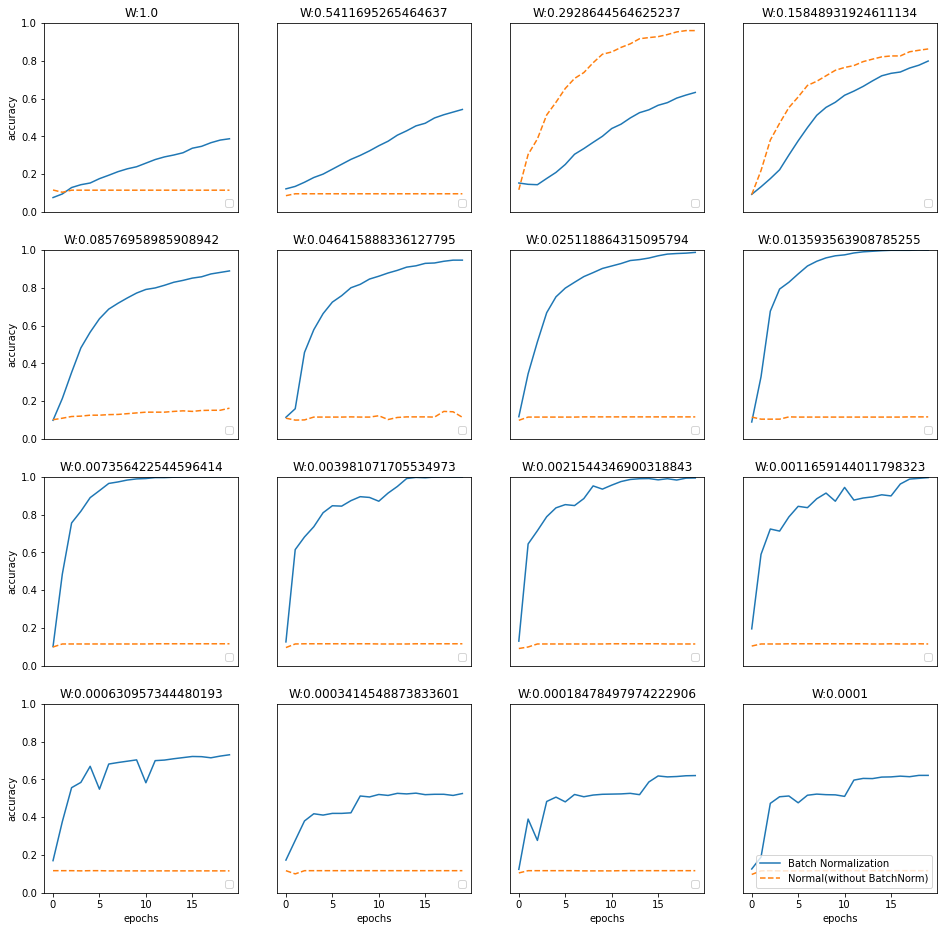

In [41]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.12, test acc:0.1112
epoch:1, train acc:0.14, test acc:0.1197
epoch:2, train acc:0.14666666666666667, test acc:0.1329
epoch:3, train acc:0.16666666666666666, test acc:0.1397
epoch:4, train acc:0.18333333333333332, test acc:0.1461
epoch:5, train acc:0.19333333333333333, test acc:0.1527
epoch:6, train acc:0.19666666666666666, test acc:0.1524
epoch:7, train acc:0.23333333333333334, test acc:0.1691
epoch:8, train acc:0.24333333333333335, test acc:0.1691
epoch:9, train acc:0.25666666666666665, test acc:0.1743
epoch:10, train acc:0.27666666666666667, test acc:0.1865
epoch:11, train acc:0.31333333333333335, test acc:0.2055
epoch:12, train acc:0.3333333333333333, test acc:0.2114
epoch:13, train acc:0.3466666666666667, test acc:0.2178
epoch:14, train acc:0.38666666666666666, test acc:0.2318
epoch:15, train acc:0.4033333333333333, test acc:0.2511
epoch:16, train acc:0.4166666666666667, test acc:0.2525
epoch:17, train acc:0.44666666666666666, test acc:0.2668
epoch:18, train ac

epoch:166, train acc:1.0, test acc:0.7525
epoch:167, train acc:1.0, test acc:0.7551
epoch:168, train acc:1.0, test acc:0.7535
epoch:169, train acc:1.0, test acc:0.7527
epoch:170, train acc:1.0, test acc:0.754
epoch:171, train acc:1.0, test acc:0.7539
epoch:172, train acc:1.0, test acc:0.7542
epoch:173, train acc:1.0, test acc:0.7548
epoch:174, train acc:1.0, test acc:0.7531
epoch:175, train acc:1.0, test acc:0.7532
epoch:176, train acc:1.0, test acc:0.7539
epoch:177, train acc:1.0, test acc:0.7552
epoch:178, train acc:1.0, test acc:0.7534
epoch:179, train acc:1.0, test acc:0.7522
epoch:180, train acc:1.0, test acc:0.7524
epoch:181, train acc:1.0, test acc:0.7537
epoch:182, train acc:1.0, test acc:0.757
epoch:183, train acc:1.0, test acc:0.756
epoch:184, train acc:1.0, test acc:0.7554
epoch:185, train acc:1.0, test acc:0.7545
epoch:186, train acc:1.0, test acc:0.7554
epoch:187, train acc:1.0, test acc:0.7557
epoch:188, train acc:1.0, test acc:0.7568
epoch:189, train acc:1.0, test acc:0.

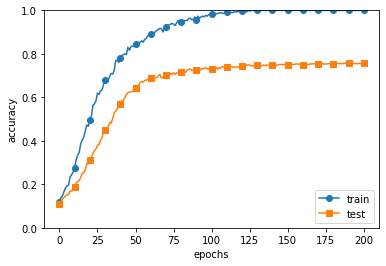

In [46]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

In [12]:
import numpy as np
x = np.arange(30).reshape((6,5))
# print(x)
# print(x.shape)
mask = np.random.rand(*x.shape) > 0.2
# print(mask.shape)
print(mask)
# print(np.mean(mask))
print(x * mask)

[[ True  True  True False  True]
 [False  True  True  True  True]
 [ True False  True  True False]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
[[ 0  1  2  0  4]
 [ 0  6  7  8  9]
 [10  0 12 13  0]
 [15 16 17 18 19]
 [ 0 21 22 23 24]
 [25 26 27 28 29]]


train loss:2.2899585819204775
=== epoch:1, train acc:0.08, test acc:0.0883 ===
train loss:2.3139126951945452
train loss:2.330988230542681
train loss:2.294197100445376
=== epoch:2, train acc:0.08333333333333333, test acc:0.0898 ===
train loss:2.313892094244136
train loss:2.3177314683439345
train loss:2.31529014244209
=== epoch:3, train acc:0.08666666666666667, test acc:0.0915 ===
train loss:2.322487009717435
train loss:2.3158539199520387
train loss:2.298666253631286
=== epoch:4, train acc:0.09333333333333334, test acc:0.0946 ===
train loss:2.3053028950942682
train loss:2.3102779358759786
train loss:2.2984792368084292
=== epoch:5, train acc:0.09666666666666666, test acc:0.0971 ===
train loss:2.2967779208088652
train loss:2.317007162199518
train loss:2.3036787892936363
=== epoch:6, train acc:0.10333333333333333, test acc:0.0997 ===
train loss:2.3294119593557316
train loss:2.3011694009416135
train loss:2.3005991941475497
=== epoch:7, train acc:0.11333333333333333, test acc:0.1046 ===
train

=== epoch:57, train acc:0.27666666666666667, test acc:0.2278 ===
train loss:2.240480476187626
train loss:2.253626324297076
train loss:2.2506061097966086
=== epoch:58, train acc:0.28, test acc:0.2299 ===
train loss:2.2431177637524518
train loss:2.2514413268358258
train loss:2.249707168472797
=== epoch:59, train acc:0.2833333333333333, test acc:0.2294 ===
train loss:2.2210807613567813
train loss:2.2629101834200394
train loss:2.2365001020731983
=== epoch:60, train acc:0.2833333333333333, test acc:0.2309 ===
train loss:2.249446112821806
train loss:2.245058206888252
train loss:2.223542635230247
=== epoch:61, train acc:0.2833333333333333, test acc:0.2317 ===
train loss:2.274838722371687
train loss:2.2592662183495653
train loss:2.235814244009129
=== epoch:62, train acc:0.29, test acc:0.237 ===
train loss:2.243753287736494
train loss:2.255518842340755
train loss:2.235728410056631
=== epoch:63, train acc:0.29, test acc:0.2359 ===
train loss:2.2271648598201503
train loss:2.2407063150573974
train

=== epoch:113, train acc:0.34, test acc:0.2865 ===
train loss:2.1393520500737377
train loss:2.154100559006715
train loss:2.1463018284867843
=== epoch:114, train acc:0.34, test acc:0.2869 ===
train loss:2.150510033837729
train loss:2.141380761704073
train loss:2.1582402369278593
=== epoch:115, train acc:0.3433333333333333, test acc:0.2869 ===
train loss:2.0958005242378643
train loss:2.0846304418038195
train loss:2.1605403947496655
=== epoch:116, train acc:0.33666666666666667, test acc:0.2863 ===
train loss:2.133534084773277
train loss:2.147043704362488
train loss:2.1241916388667437
=== epoch:117, train acc:0.3433333333333333, test acc:0.2867 ===
train loss:2.1113280417658906
train loss:2.144539822868844
train loss:2.157911899383414
=== epoch:118, train acc:0.35333333333333333, test acc:0.2877 ===
train loss:2.1659794548805964
train loss:2.13813925194411
train loss:2.144234634112743
=== epoch:119, train acc:0.36, test acc:0.2895 ===
train loss:2.107082147142445
train loss:2.1131687343823

=== epoch:168, train acc:0.38, test acc:0.3232 ===
train loss:1.926534023096145
train loss:1.886276621588819
train loss:1.8796517027945712
=== epoch:169, train acc:0.38, test acc:0.3235 ===
train loss:1.9427696784172954
train loss:1.8117988107611072
train loss:1.8821331289106893
=== epoch:170, train acc:0.38, test acc:0.3222 ===
train loss:1.928562100175336
train loss:1.913583263518566
train loss:1.9093221413673422
=== epoch:171, train acc:0.3933333333333333, test acc:0.328 ===
train loss:1.9540643752522475
train loss:1.8606462615787405
train loss:1.8549949256378726
=== epoch:172, train acc:0.4, test acc:0.3307 ===
train loss:1.832024909688077
train loss:1.8227904851490253
train loss:1.8710622466954776
=== epoch:173, train acc:0.4033333333333333, test acc:0.3328 ===
train loss:1.8491107917474272
train loss:1.8162352909903805
train loss:1.8488823960071996
=== epoch:174, train acc:0.4066666666666667, test acc:0.3327 ===
train loss:1.8286930642159218
train loss:1.888957186850456
train los

=== epoch:223, train acc:0.46, test acc:0.3701 ===
train loss:1.4333623322805287
train loss:1.4577943994675773
train loss:1.498349436399684
=== epoch:224, train acc:0.4533333333333333, test acc:0.3659 ===
train loss:1.4291509126322655
train loss:1.6327394496771293
train loss:1.55616058305515
=== epoch:225, train acc:0.4633333333333333, test acc:0.3705 ===
train loss:1.436735151962658
train loss:1.4886856397246138
train loss:1.5914443512246528
=== epoch:226, train acc:0.46, test acc:0.3703 ===
train loss:1.5160467212610775
train loss:1.5252464328825601
train loss:1.5034005155630468
=== epoch:227, train acc:0.45666666666666667, test acc:0.3717 ===
train loss:1.4749823150416304
train loss:1.4345474176969075
train loss:1.3885097380486142
=== epoch:228, train acc:0.4633333333333333, test acc:0.3716 ===
train loss:1.6020850377082427
train loss:1.4259704858946762
train loss:1.5158160060063737
=== epoch:229, train acc:0.47, test acc:0.3777 ===
train loss:1.4623879850160364
train loss:1.5807393

=== epoch:278, train acc:0.5666666666666667, test acc:0.4584 ===
train loss:1.134287645075326
train loss:1.3028585207739747
train loss:1.308741955357601
=== epoch:279, train acc:0.5666666666666667, test acc:0.4563 ===
train loss:1.238205133990174
train loss:1.215191067794358
train loss:1.2207306718963598
=== epoch:280, train acc:0.5666666666666667, test acc:0.4563 ===
train loss:1.1818545616093328
train loss:1.229978641090041
train loss:1.1061389250014444
=== epoch:281, train acc:0.5766666666666667, test acc:0.4618 ===
train loss:1.083309795023157
train loss:1.2558037008188812
train loss:1.2917014553594048
=== epoch:282, train acc:0.5766666666666667, test acc:0.4663 ===
train loss:1.2166950296867745
train loss:1.0640362087437416
train loss:1.1872210281371136
=== epoch:283, train acc:0.58, test acc:0.4636 ===
train loss:1.1855693483925764
train loss:1.1525225119511602
train loss:1.1341878755011137
=== epoch:284, train acc:0.5733333333333334, test acc:0.465 ===
train loss:1.1429333260855

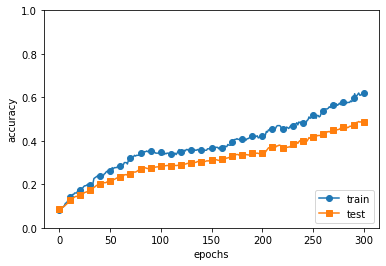

In [8]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

val acc:0.76 | lr:0.009148199165414608, weight decay:8.662597697273085e-06
val acc:0.13 | lr:0.0006936255480032815, weight decay:6.99591505427695e-05
val acc:0.07 | lr:7.50374092510703e-05, weight decay:2.136385282541291e-08
val acc:0.12 | lr:6.44737803725635e-06, weight decay:1.0755551923890743e-05
val acc:0.14 | lr:0.0005620055256653147, weight decay:2.057016177290107e-07
val acc:0.08 | lr:4.1881631002605094e-05, weight decay:5.694119296522235e-06
val acc:0.75 | lr:0.008057119100822125, weight decay:1.9857873177979526e-08
val acc:0.15 | lr:1.2216926461113917e-05, weight decay:2.3574866759128478e-08
val acc:0.11 | lr:1.0411642947497446e-06, weight decay:1.0226508484864606e-05
val acc:0.11 | lr:0.0003217100468845136, weight decay:1.3183528730543645e-07
val acc:0.23 | lr:0.00073669877727852, weight decay:6.399609300076623e-06
val acc:0.11 | lr:1.274647565262278e-05, weight decay:2.2693366390506056e-06
val acc:0.07 | lr:0.00020793235100092378, weight decay:1.6499231574945383e-05
val acc: